### 딥러닝을 가능케하는 autograd

In [1]:
import torch

x = torch.tensor([1.], requires_grad=True)
# requires_grad의 기본값은 False
# 안의 값은 실수여야함 -> 미분은 실수에 대해서만 가능하니까
print(x)

tensor([1.], requires_grad=True)


In [3]:
x = torch.tensor([1.])
# requires_grad의 기본값은 False
print(x)
print(x.requires_grad)

x.requires_grad = True
print(x)

tensor([1.])
False
tensor([1.], requires_grad=True)


In [4]:
x = torch.tensor([1.], requires_grad=True)
y = x**2
print(y)
# grad_fn로 PowBackward0가 붙어있는걸 확인할 수 있다.
# grad_fn은 이 requires_grad가 True인 변수에 대해 어떤 연산을 했는지 표시
# 실제론 모든 연산이 다 포함되지만, 가장 마지막에 한 연산만 표시함.

print(x.grad)
y.backward()
print(x.grad) # y = x**2를 미분한 값에 1을 대입한 gradient가 담긴다.

tensor([1.], grad_fn=<PowBackward0>)
None
tensor([2.])


In [9]:
x = torch.tensor([1.], requires_grad=True)
y = x**2
print(y)
# y.retain_grad() # 이걸 하면 y.grad도 볼 수 있다

z = 3*y
print(z)
# MulBackward0 가 붙어있다!
# 마지막으로 한 연산이 곱이였기 때문

z.backward()
print(x.grad) # chain rule로 알아냄
# print(y.grad) # warning! 중간건 안된다
# 주석 풀고 실행해보면 y가 리프텐서가 아니라고 뜸(리프텐서가 requires_grad True인거)
# 이는 중간 다리역할을 하는 것들의 그래디언트를 저장하면 메모리 소모가 심함.
# 위에 retain_grad()를 써주면 유지가 돼서 볼 수 있음. 안쓰면 볼 수 없음.

tensor([1.], grad_fn=<PowBackward0>)
tensor([3.], grad_fn=<MulBackward0>)
tensor([6.])


In [10]:
x = torch.tensor([1.], requires_grad=True)
y = x**2
z = 3*y

y.backward() # y에서 부터 backward연산을 할 수도 있다.
print(x.grad) # chain rule로 알아냄

tensor([2.])


In [11]:
# 다변수에 대해서도 정상적으로 작동한다.
x = torch.tensor([1.], requires_grad=True)
y = torch.tensor([1.], requires_grad=True)
z = 2*x**2 + y**2
print(z)
z.backward()
print(x.grad)
print(y.grad)

tensor([3.], grad_fn=<AddBackward0>)
tensor([4.])
tensor([2.])


In [12]:
# 하나의 값이 아니라 텐서 형태도 정상적으로 잘된다.
x = torch.tensor([1., 2., 3.], requires_grad=True)
y = torch.sum(x**2) # x1**2 + x2**2 + x3**2
y.backward()

print(y)
print(x.grad) # 스칼라를 벡터로 미분

tensor(14., grad_fn=<SumBackward0>)
tensor([2., 4., 6.])


In [13]:
# transfer learning할때 일부 텐서는 변화하지 않게 바꿀 수 있음.
x = torch.tensor([1.], requires_grad=True)
x.requires_grad = False
# transfer learning 할 때 필요
y = x**2
print(y)
# y.backward() # error!

tensor([1.])


In [14]:
x = torch.tensor([2.], requires_grad=True)
x2 = x.detach()
# detach는 값은 그대로이고 requires_grad=False 인 새로운 텐서를 만드는 것
print(x)
print(x2)
y = x**2
print(y)
y2 = x2**2
print(y2)

tensor([2.], requires_grad=True)
tensor([2.])
tensor([4.], grad_fn=<PowBackward0>)
tensor([4.])


In [15]:
# detach 사용 용도
x = torch.tensor([1.], requires_grad=True)
y = x**2
z = y.detach()
# x로 만든 것을 상수로 사용하고 싶은 것.
# 중간에 y.requires_grad=False 이런 식으론 불가능
# 이것도  transfer learning할때 이미 학습된 모델에서 feature만 떼와서 넣음
w = y + z # x**2+1 과 같다

w.backward()
print(x.grad)

tensor([2.])


In [16]:
# 많이 쓰이는 torch.no_grad()
x = torch.tensor([1.], requires_grad=True)

# chain rule을 위해 계속 grad_fn을 update 하니까
# grad_fn 잠시 안 계산하고 싶을 때 사용
# 모델 테스트 시에는 불필요하게 메모리 쓸 필요 없기 때문!
with torch.no_grad():
    y = x**2
    print(x.requires_grad) # 이것도 True임 즉 no_grad를 써도 requires_grad는 유지됨
    print(y) # with 안에서 계산되는 애는 grad_fn 이 안붙음
print(x.requires_grad)
# y.backward() # error!

y = x**2
print(y)

x = torch.tensor([1.], requires_grad=True)
x.requires_grad=False
y = x**2
print(x.requires_grad)
print(y)
# y.backward() # error!

True
tensor([1.])
True
tensor([1.], grad_fn=<PowBackward0>)
False
tensor([1.])


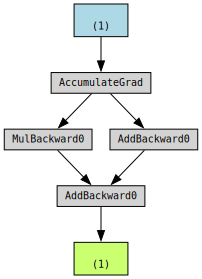

In [19]:
!pip install torchviz
from torchviz import make_dot
x = torch.tensor([1.], requires_grad=True)
# make_dot(x)
# make_dot(x**2) # (1) 이라고 써있는 것은 shape 을 나타냄
# make_dot(x**2+1)
# make_dot((x**2+1)**2)

y=2*x
z=3+x
r=y+z
make_dot(r)

# 참고
# AccumulateGrad: x (requires_grad=True인 텐서), 그래디언트 최종 저장소.
# AddmmBackward0: nn.Linear (선형 계층), 행렬 곱셈과 덧셈(Wx+b)의 미분.
# ConvolutionBackward0: nn.Conv2d (컨볼루션), 컨볼루션 연산의 미분.
# ReluBackward0: nn.ReLU (활성화 함수), ReLU 함수의 미분 (0보다 큰 부분만 그래디언트 통과).
# SumBackward0 / MeanBackward0: torch.sum / torch.mean (합계/평균), 손실 계산에 사용되며 그래디언트를 모든 원소에 동일하게 전파.
# MulBackward0 / AddBackward0: * / + (곱셈/덧셈), 기본 산술 연산의 미분.
# PowBackward0: ** (거듭제곱), 거듭제곱 함수의 미분.
